# DATA SCIENCE INTERN - OCTOBER 2021 

# ABHISHEK MURTHY

# KNN SCRATCH IMPLEMENTAION 

 1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Importing and exploring the data:

In [3]:
df = pd.read_csv("C:/Users/Abhi/Desktop/diamonds.csv")
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
df.columns #All columns name

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
df.shape #(number of rows , number of columns)

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
# Numerical Columns
numerical_data = df.select_dtypes(['int64','float64'])
numerical_cols = numerical_data.columns
print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [8]:
# Categorical Columns
categorical_data = df.select_dtypes(['object'])
categorical_cols = categorical_data.columns
print('Categotical Columns : {}'.format(list(categorical_cols)))

Categotical Columns : ['cut', 'color', 'clarity']


In [9]:
# Quick statistical Analysis of the Dataset
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [10]:
df = df.loc[(df[['x','y','z']]!=0).all(axis=1)]
df.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [11]:
# Checking for null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Exploratory Data Analysis and Visualization:

# Univariate Analysis:

In [12]:
# Let's create a function to save time
def plot(clm):
    sns.set_style("dark")
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[clm])
    plt.axvline(df[clm].mean(), color="red", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.subplot(1, 2, 2)
    sns.histplot(df[clm])
    plt.axvline(df[clm].mean(), color="blue", label="Mean")
    plt.legend(shadow=True,fontsize="larger")

    skew = df[clm].skew()
    kurt = df[clm].kurt()
    print('Skewness:{}'.format(round(skew,2)))
    print('Kurtosis:{}'.format(round(kurt,2)))

# Distribution of carat:

Skewness:1.12
Kurtosis:1.26


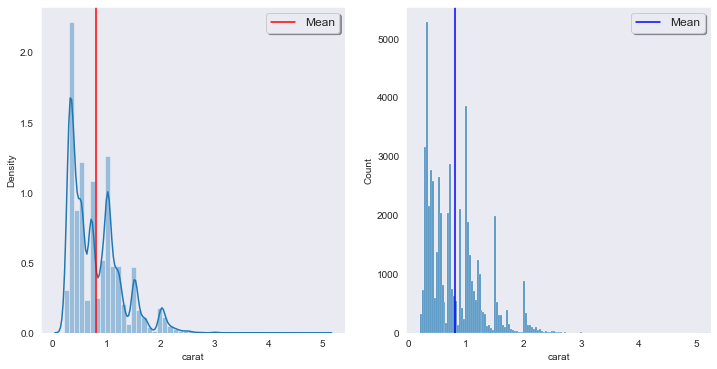

In [13]:
plot('carat')

# Distribution of depth:

Skewness:-0.08
Kurtosis:5.75


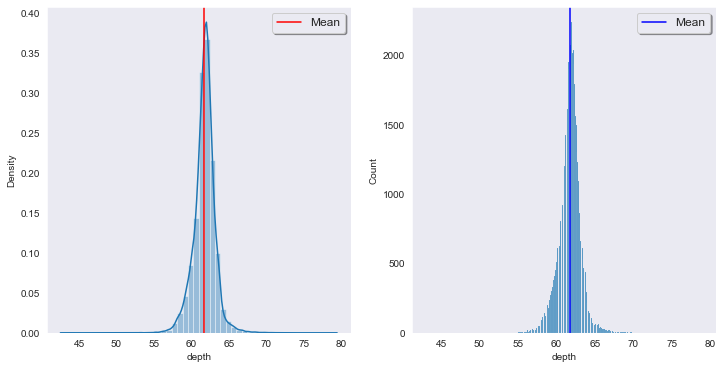

In [14]:
plot('depth')

# Distribution of table:

Skewness:0.8
Kurtosis:2.8


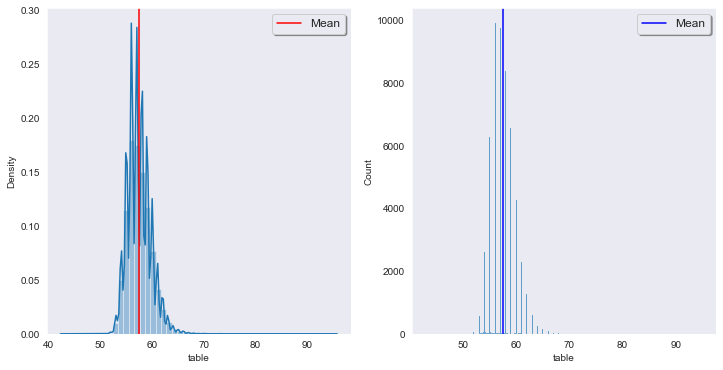

In [15]:
plot('table')

# Distribution of price

In [16]:
plot('price')

Skewness:1.62
Kurtosis:2.18


# Distribution of x

In [17]:
plot('x')

Skewness:0.4
Kurtosis:-0.7


# Distribution of y

In [18]:
plot('y')

Skewness:2.46
Kurtosis:91.83


# Distribution of z:

Skewness:1.59
Kurtosis:47.76


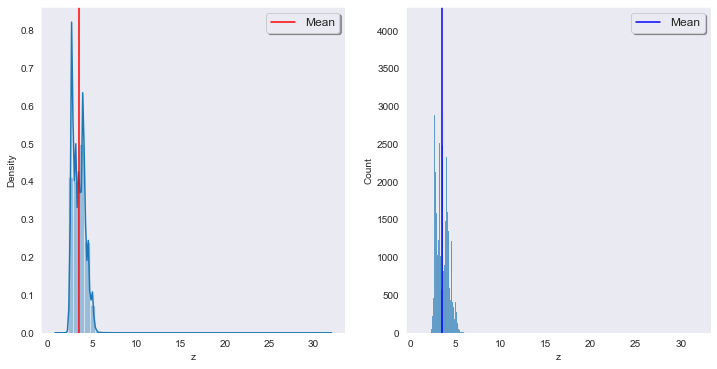

In [19]:
plot('z')

# Ploting the cut column to find the count:

In [20]:
df.cut

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53920, dtype: object

In [21]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [22]:
counts_cut = df['cut'].value_counts()
counts_cut

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

Text(0, 0.5, 'Count')

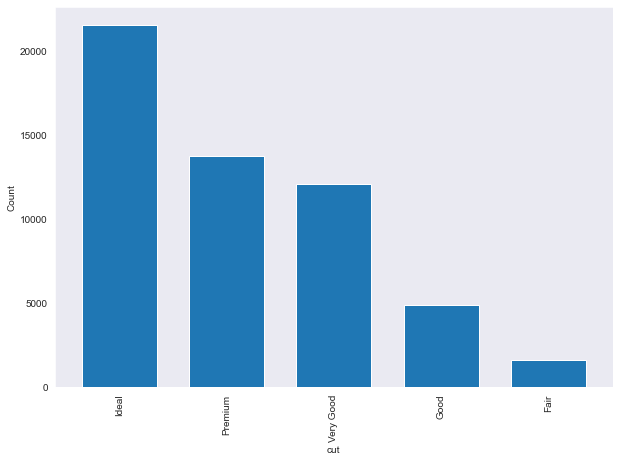

In [23]:
sns.set_style("dark")
plt.figure(figsize=(10,7))
counts_cut.plot(kind='bar' , width=0.7)
plt.xlabel('cut')
plt.ylabel('Count')

# Ploting the color column to find the count:

In [24]:
df.color

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53920, dtype: object

In [25]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [26]:
counts_color = df['color'].value_counts()
counts_color

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

Text(0, 0.5, 'Count')

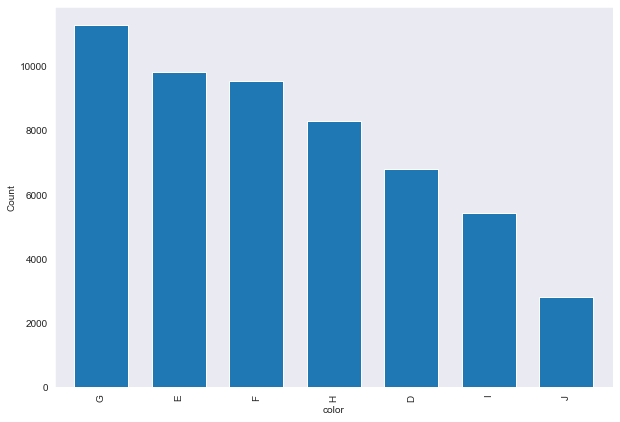

In [27]:
sns.set_style("dark")
plt.figure(figsize=(10,7))
counts_color.plot(kind='bar' , width=0.7)
plt.xlabel('color')
plt.ylabel('Count')

# Ploting the clarity column to find the count:

In [28]:
df.clarity

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53920, dtype: object

In [29]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [30]:
counts_clarity = df['clarity'].value_counts()
counts_clarity

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

In [31]:
sns.set_style("dark")
plt.figure(figsize=(10,7))
counts_clarity.plot(kind='bar' , width=0.7)
plt.xlabel('clarity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

# Bivariate Analysis:

In [32]:
df.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028259  0.181646  0.921592  0.977779  0.953991  0.961048
depth  0.028259  1.000000 -0.295733 -0.010729 -0.025017 -0.029069  0.095023
table  0.181646 -0.295733  1.000000  0.127245  0.196097  0.184493  0.152483
price  0.921592 -0.010729  0.127245  1.000000  0.887231  0.867864  0.868206
x      0.977779 -0.025017  0.196097  0.887231  1.000000  0.974918  0.975435
y      0.953991 -0.029069  0.184493  0.867864  0.974918  1.000000  0.956744
z      0.961048  0.095023  0.152483  0.868206  0.975435  0.956744  1.000000

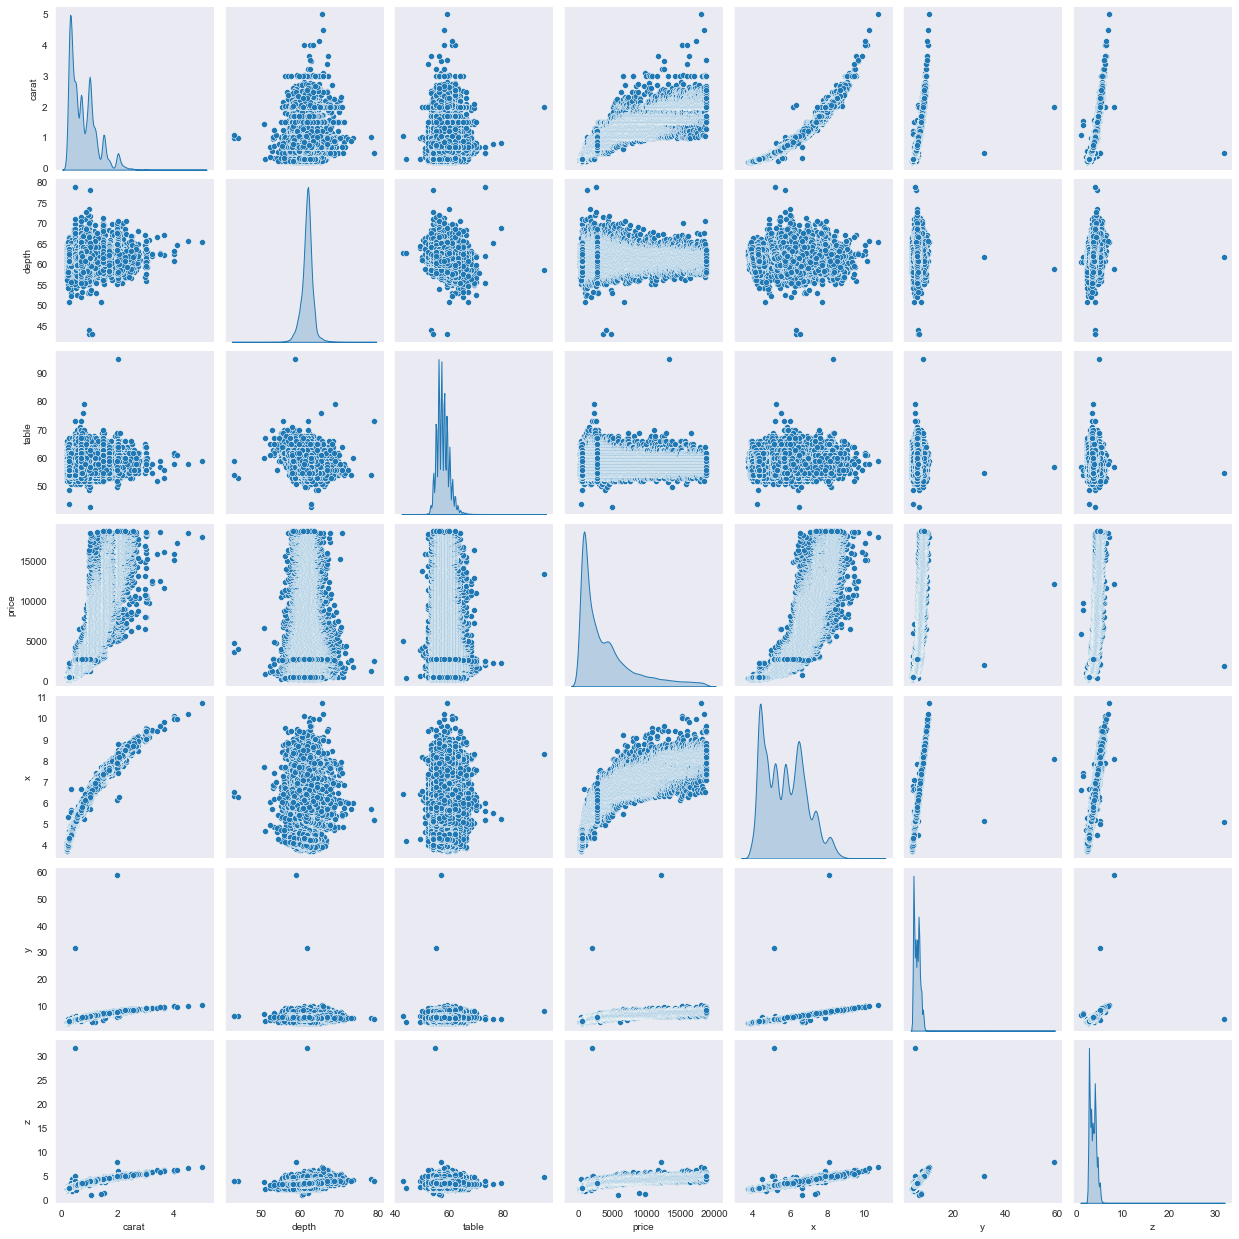

In [33]:
sns.pairplot(df , diag_kind = 'kde');

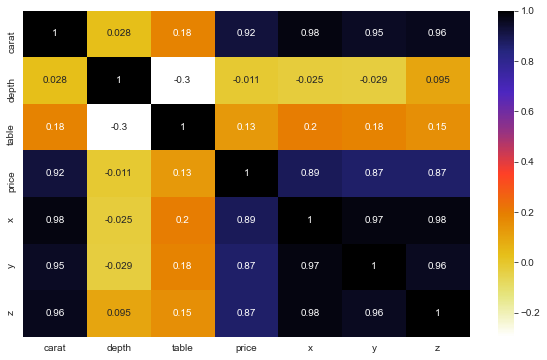

In [34]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True ,cmap=plt.cm.CMRmap_r);

# From the above plots we can say that column 'x','y','z' are highly correlated with the target column 'price'

Outliers detection:

In [35]:
plt.figure(figsize=(16,10))
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.boxplot(df['depth'])
plt.subplot(2, 3, 2)
sns.boxplot(df['table'])
plt.subplot(2, 3, 3)
sns.boxplot(df['x'])
plt.subplot(2, 3, 4)
sns.boxplot(df['y'])
plt.subplot(2, 3, 5)
sns.boxplot(df['z'])

<AxesSubplot:xlabel='z'>

In [36]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

In [37]:
#Normalising the data:
# MinMaxScaller for Numerical column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
numerical = df.select_dtypes(include=['int64', 'float64'])   
df_numerical = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)
df_numerical.head()

carat     depth     table     price         x         y         z
0  0.006237  0.469298  0.333333  0.000000  0.031384  0.043732  0.075203
1  0.002079  0.394737  0.500000  0.000000  0.022825  0.023324  0.050813
2  0.006237  0.267544  0.611111  0.000054  0.045649  0.056851  0.050813
3  0.018711  0.508772  0.416667  0.000433  0.067047  0.080175  0.115854
4  0.022869  0.548246  0.416667  0.000487  0.087019  0.097668  0.140244

In [39]:
# One Hot Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [40]:
categorical = df.select_dtypes('object')
df_categorical = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))
df_categorical.head()

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use,

cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  color_G  \
0       0.0        1.0          0.0            0.0      1.0      0.0      0.0   
1       0.0        0.0          1.0            0.0      1.0      0.0      0.0   
2       1.0        0.0          0.0            0.0      1.0      0.0      0.0   
3       0.0        0.0          1.0            0.0      0.0      0.0      0.0   
4       1.0        0.0          0.0            0.0      0.0      0.0      0.0   

   color_H  color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  \
0      0.0      0.0      0.0         0.0          0.0          1.0   
1      0.0      0.0      0.0         0.0          1.0          0.0   
2      0.0      0.0      0.0         0.0          0.0          0.0   
3      0.0      1.0      0.0         0.0          0.0          0.0   
4      0.0      0.0      1.0         0.0          0.0          1.0   

   clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0          0.0          0.0           0.0           0.0  
1          0.0          0.0           0.0           0.0  
2          1.0          0.0           0.0           0.0  
3          0.0          1.0           0.0           0.0  
4          0.0          0.0           0.0           0.0

In [41]:
#Final dataset 
final_df = pd.concat([df_numerical,df_categorical], axis = 1)
final_df.head()

carat     depth     table     price         x         y         z  \
0  0.006237  0.469298  0.333333  0.000000  0.031384  0.043732  0.075203   
1  0.002079  0.394737  0.500000  0.000000  0.022825  0.023324  0.050813   
2  0.006237  0.267544  0.611111  0.000054  0.045649  0.056851  0.050813   
3  0.018711  0.508772  0.416667  0.000433  0.067047  0.080175  0.115854   
4  0.022869  0.548246  0.416667  0.000487  0.087019  0.097668  0.140244   

   cut_Good  cut_Ideal  cut_Premium  ...  color_H  color_I  color_J  \
0       0.0        1.0          0.0  ...      0.0      0.0      0.0   
1       0.0        0.0          1.0  ...      0.0      0.0      0.0   
2       1.0        0.0          0.0  ...      0.0      0.0      0.0   
3       0.0        0.0          1.0  ...      0.0      1.0      0.0   
4       1.0        0.0          0.0  ...      0.0      0.0      1.0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0         0.0          0.0          1.0          0.0          0.0   
1         0.0          1.0          0.0          0.0          0.0   
2         0.0          0.0          0.0          1.0          0.0   
3         0.0          0.0          0.0          0.0          1.0   
4         0.0          0.0          1.0          0.0          0.0   

   clarity_VVS1  clarity_VVS2  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  

[5 rows x 24 columns]

# Splitting the columns:

In [42]:
X= final_df.drop(["price"],axis =1)
Y= final_df["price"]

# Splitting the dataset into Train and Test data:

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# Building KNN Algorithm from scratch:

In [44]:
class KNN_Reg:
    def __init__(self,K):
        self.K=K
        
    def fit(self,X,Y):
        self.X=np.asarray(X)
        self.Y=np.asarray(Y)
        
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.K]
            result.append(np.mean(self.Y[index]))
        return np.array(result)

In [45]:
Model_Scrach=KNN_Reg(K=3)
Model_Scrach.fit(X_train,Y_train)
y_pred_sc=Model_Scrach.predict(X_test)

# sklearn KNN Model:

In [46]:
from sklearn.neighbors import KNeighborsRegressor
Model_KNN = KNeighborsRegressor( n_neighbors = 3 )
Model_KNN.fit( X_train, Y_train )
Y_pred_builtin =  Model_KNN.predict( X_test )

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

# Results after comparing sklearn model with the scrach model:

In [47]:
print( "Predicted values by our model     :  ", np.round( y_pred_sc[:3], 2 ) )       
print( "Predicted values by sklearn model :  ", np.round( Y_pred_builtin[:3], 2 ) )

Predicted values by our model     :   [0.23 0.07 0.11]
Predicted values by sklearn model :   [0.23 0.07 0.11]
